In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import sys
import json
#current_dir = os.getcwd()
#root_dir = os.path.dirname(os.path.dirname(current_dir))
#sys.path.append(root_dir)
from src.data.spectrum_decomposition.spectrum import SpectrumDecomposition 
from src.statistical_methods.hmm.hmm import HMM
from src.data.utils import add_type_column
import src.data.utils as utils


from os import listdir
from os.path import isfile, join

%load_ext autoreload
%autoreload 2


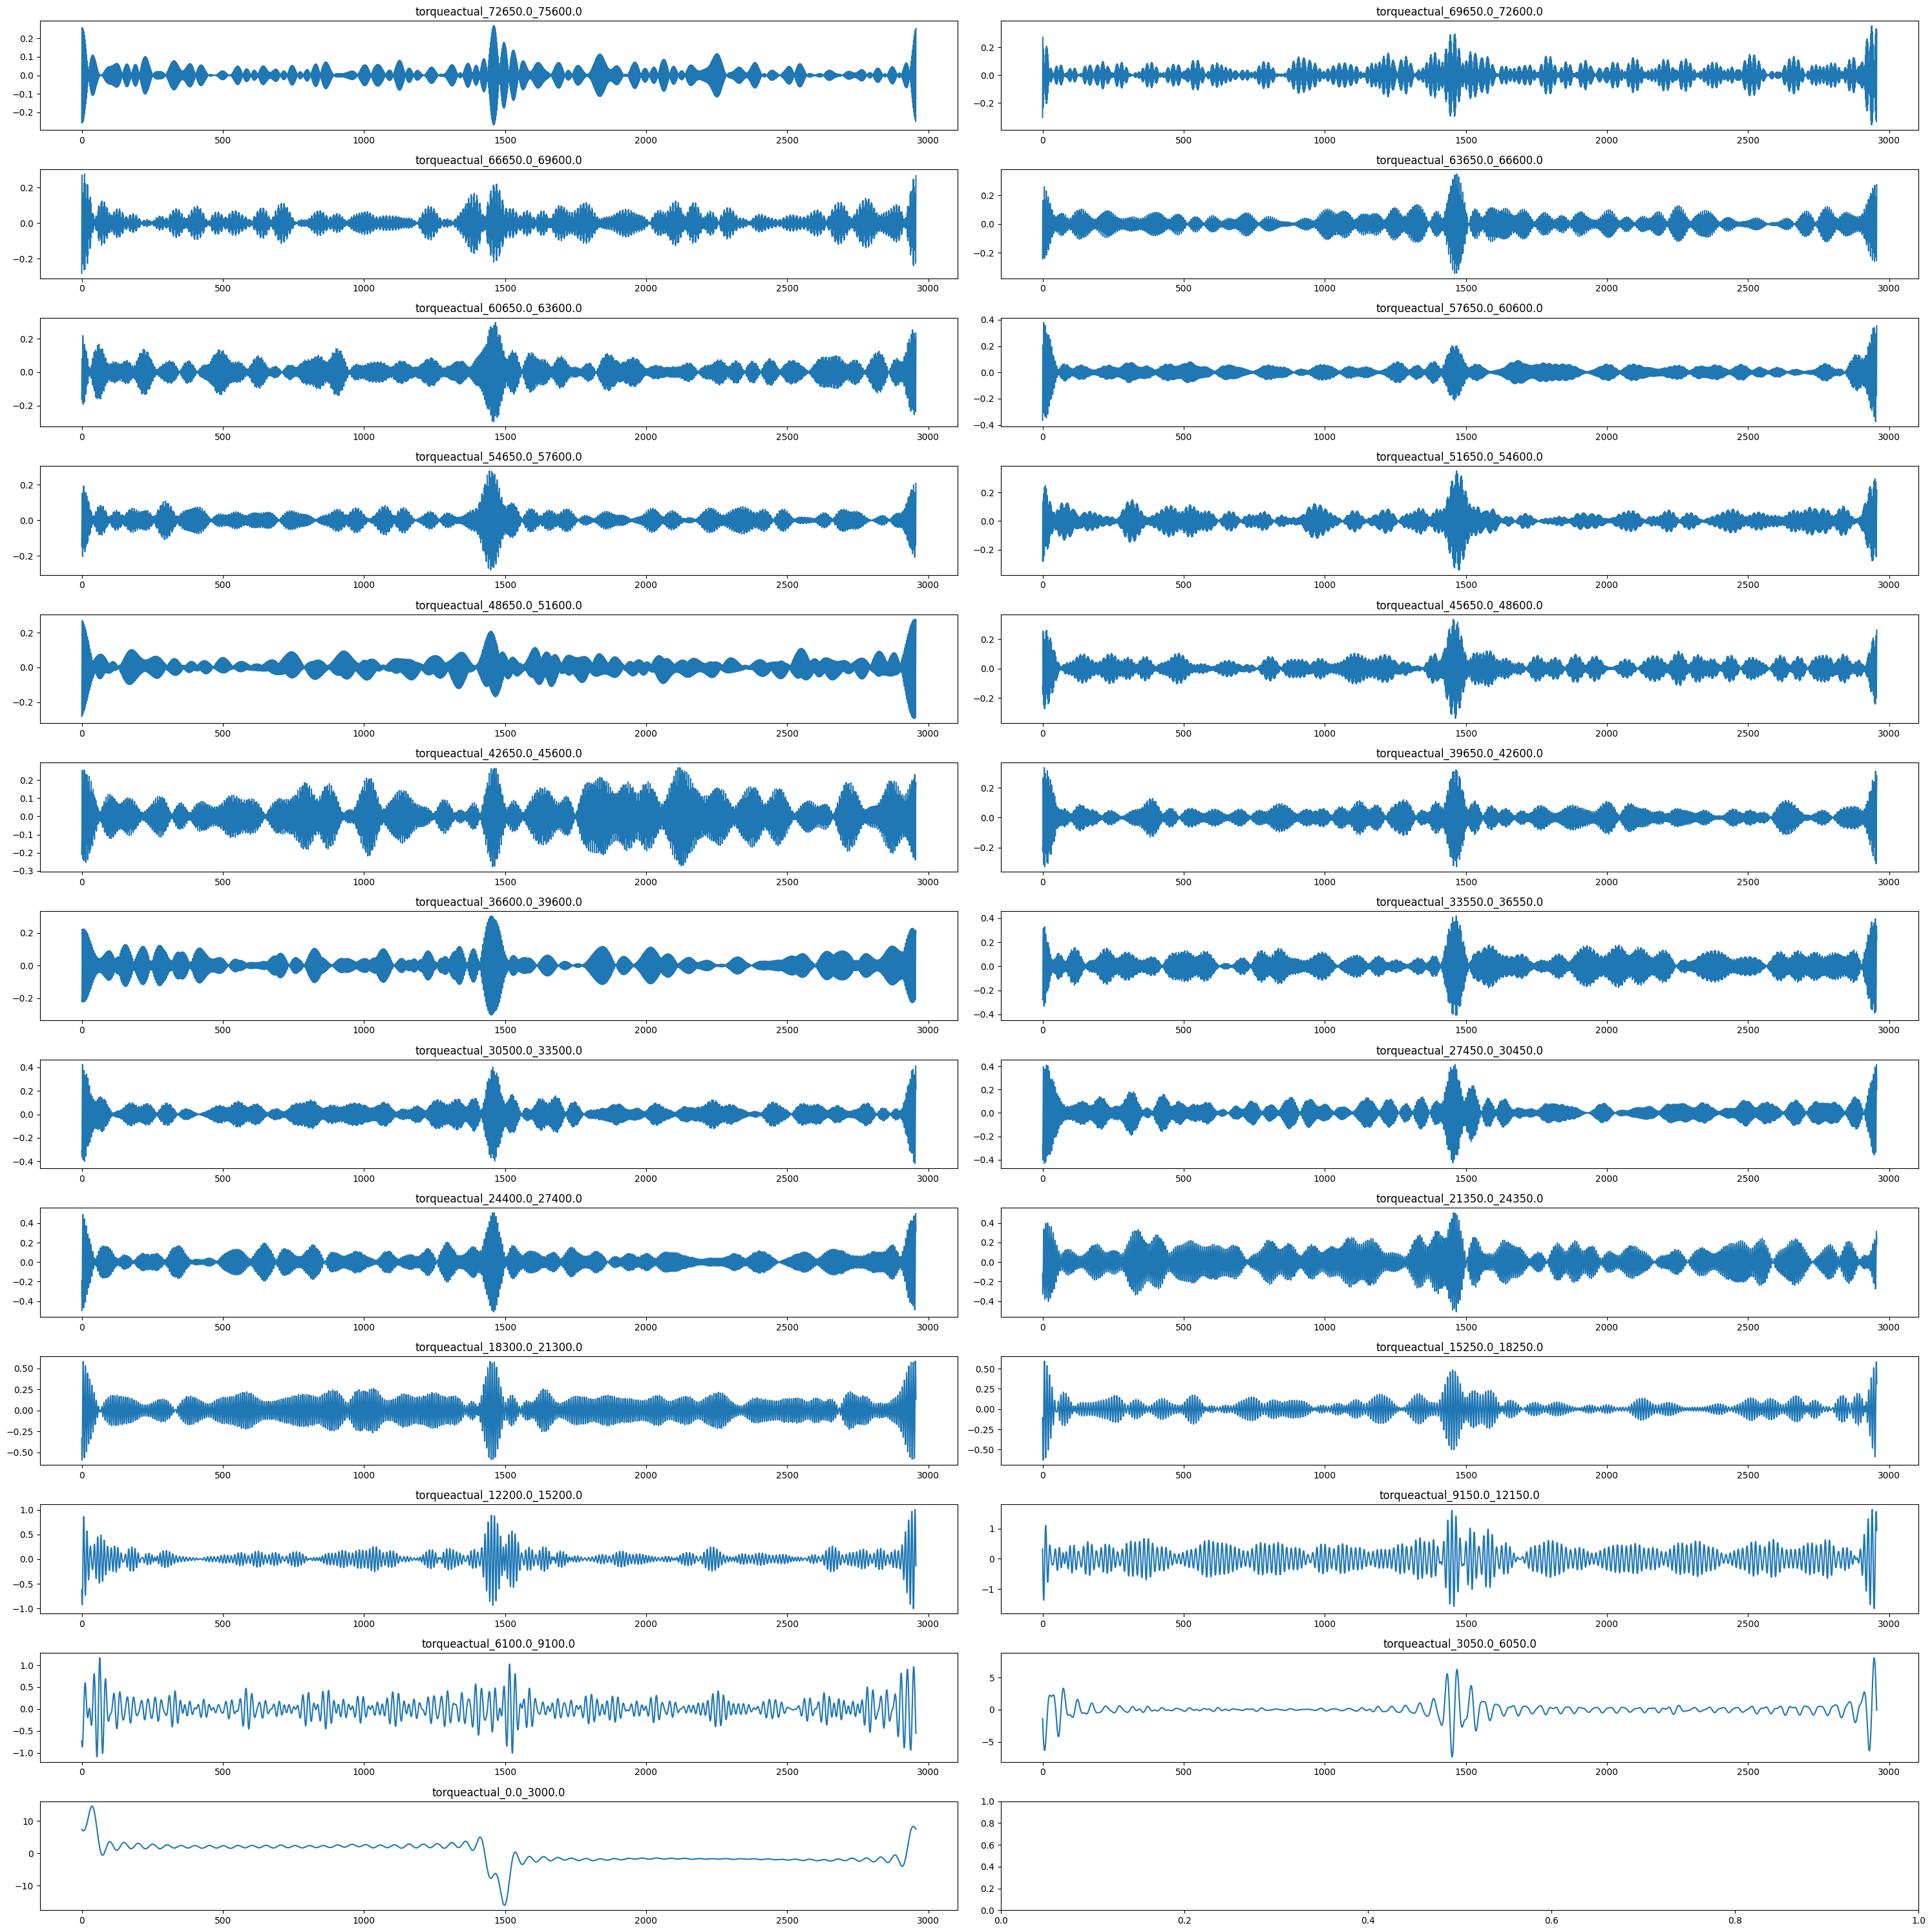

In [2]:
resampled_tl_data = pd.read_csv("data/cleaned_data/440_resampled_TL.csv")
rand_sequence = resampled_tl_data[
    resampled_tl_data["id"] == resampled_tl_data["id"].sample(1).values[0]
]
columns = [
    'torqueactual_72650.0_75600.0',
       'torqueactual_69650.0_72600.0', 'torqueactual_66650.0_69600.0',
       'torqueactual_63650.0_66600.0', 'torqueactual_60650.0_63600.0',
       'torqueactual_57650.0_60600.0', 'torqueactual_54650.0_57600.0',
       'torqueactual_51650.0_54600.0', 'torqueactual_48650.0_51600.0',
       'torqueactual_45650.0_48600.0', 'torqueactual_42650.0_45600.0',
       'torqueactual_39650.0_42600.0', 'torqueactual_36600.0_39600.0',
       'torqueactual_33550.0_36550.0', 'torqueactual_30500.0_33500.0',
       'torqueactual_27450.0_30450.0', 'torqueactual_24400.0_27400.0',
       'torqueactual_21350.0_24350.0', 'torqueactual_18300.0_21300.0',
       'torqueactual_15250.0_18250.0', 'torqueactual_12200.0_15200.0',
       'torqueactual_9150.0_12150.0', 'torqueactual_6100.0_9100.0',
       'torqueactual_3050.0_6050.0', 'torqueactual_0.0_3000.0'
]

fig, axes = plt.subplots(13, 2, figsize=(30, 30))
x = [i for i in range(len(rand_sequence))]

for i, col in enumerate(columns):
    axes.flat[i].plot(x, rand_sequence[col])
    axes.flat[i].title.set_text(col)

fig.tight_layout()
plt.show()

# Hidden Markov Model

## Data Spectrum Decomposition

In [3]:
tl_data = pd.read_parquet("data/cleaned_data/TL_add_data_without_duplicates.parquet")
tl_data['id'].unique()


array(['7600-100440|2022-11-10_09:42:57',
       '7600-100440|2022-12-08_09:40:32',
       '7600-100498|2022-03-02_04:58:34',
       '7600-100440|2022-02-28_04:51:33',
       '7600-100440|2022-01-13_04:57:50',
       '7600-100498|2022-01-05_05:06:16',
       '7600-100440|2022-01-26_06:34:30',
       '7600-100498|2022-01-26_06:41:26',
       '7600-100498|2022-02-02_05:04:51',
       '7600-100440|2022-11-03_08:14:15',
       '7600-100498|2022-01-12_05:04:04',
       '7600-100498|2022-01-19_05:03:58',
       '7600-100440|2022-02-03_04:56:22',
       '7600-100498|2022-02-09_04:58:22',
       '7600-100440|2022-02-10_06:00:21',
       '7600-100440|2022-11-24_09:39:30',
       '7600-100440|2022-02-18_04:47:55',
       '7600-100440|2022-01-01_04:56:40',
       '7600-100498|2022-01-01_05:03:30',
       '7600-100440|2022-01-06_04:59:45',
       '7600-100440|2022-01-20_04:54:15',
       '7600-100440|2022-12-04_08:13:51',
       '7600-100440|2022-12-15_08:10:45',
       '7600-100440|2022-12-23_08:

In [4]:

tl_data = add_type_column(tl_data)
tl_data = tl_data[tl_data["type"] == "100440"]
sd = SpectrumDecomposition(col_name="torqueactual", n_freq=25)
tl_data_decomposed = sd.transform(tl_data)
tl_data_decomposed.to_parquet(
    "data/cleaned_data/440_decomposed_TL.parquet", index=False
)
tl_data_decomposed["id"].unique()

array(['7600-100440|2022-11-10_09:42:57',
       '7600-100440|2022-12-08_09:40:32',
       '7600-100440|2022-02-28_04:51:33',
       '7600-100440|2022-01-13_04:57:50',
       '7600-100440|2022-01-26_06:34:30',
       '7600-100440|2022-11-03_08:14:15',
       '7600-100440|2022-02-03_04:56:22',
       '7600-100440|2022-02-10_06:00:21',
       '7600-100440|2022-11-24_09:39:30',
       '7600-100440|2022-02-18_04:47:55',
       '7600-100440|2022-01-01_04:56:40',
       '7600-100440|2022-01-06_04:59:45',
       '7600-100440|2022-01-20_04:54:15',
       '7600-100440|2022-12-04_08:13:51',
       '7600-100440|2022-12-15_08:10:45',
       '7600-100440|2022-12-23_08:03:37',
       '7600-100440|2022-11-17_09:42:07',
       '7600-100440|2022-10-27_09:18:03'], dtype=object)

## Generated Re-sampled dataset

In [7]:
print(tl_data_decomposed["id"].unique())
rand_ids = np.random.choice(tl_data_decomposed["id"].unique(), 400)
print(rand_ids)

['7600-100440|2022-11-10_09:42:57' '7600-100440|2022-12-08_09:40:32'
 '7600-100440|2022-02-28_04:51:33' '7600-100440|2022-01-13_04:57:50'
 '7600-100440|2022-01-26_06:34:30' '7600-100440|2022-11-03_08:14:15'
 '7600-100440|2022-02-03_04:56:22' '7600-100440|2022-02-10_06:00:21'
 '7600-100440|2022-11-24_09:39:30' '7600-100440|2022-02-18_04:47:55'
 '7600-100440|2022-01-01_04:56:40' '7600-100440|2022-01-06_04:59:45'
 '7600-100440|2022-01-20_04:54:15' '7600-100440|2022-12-04_08:13:51'
 '7600-100440|2022-12-15_08:10:45' '7600-100440|2022-12-23_08:03:37'
 '7600-100440|2022-11-17_09:42:07' '7600-100440|2022-10-27_09:18:03']
['7600-100440|2022-02-03_04:56:22' '7600-100440|2022-11-03_08:14:15'
 '7600-100440|2022-12-15_08:10:45' '7600-100440|2022-02-10_06:00:21'
 '7600-100440|2022-02-28_04:51:33' '7600-100440|2022-02-03_04:56:22'
 '7600-100440|2022-11-24_09:39:30' '7600-100440|2022-12-23_08:03:37'
 '7600-100440|2022-02-28_04:51:33' '7600-100440|2022-11-24_09:39:30'
 '7600-100440|2022-12-23_08:03:37

In [8]:
rand_ids = np.random.choice(tl_data_decomposed["id"].unique(), 400)
sequences = []

for i, _id in enumerate(rand_ids):
    sequence = tl_data_decomposed[tl_data_decomposed["id"] == _id]
    sequence["id"] = i 
    sequences.append(sequence)

resampled_tl_data = pd.concat(sequences).reset_index(drop=True)
resampled_tl_data.to_csv("data/cleaned_data/440_resampled_TL.csv", index=False)

C:\Users\Luuk Verkleij\AppData\Local\Temp\ipykernel_15716\1860256838.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sequence["id"] = i


## Train Models

In [10]:
# resampled_tl_data = pd.read_csv("data/cleaned_data/440_resampled_TL.csv")

In [11]:
columns = [
    "torqueactual_0.0_3000.0",
    "torqueactual_3050.0_6050.0",
    "torqueactual_6100.0_9100.0",
    "torqueactual_9150.0_12150.0",
    "torqueactual_12200.0_15200.0",
    "torqueactual_15250.0_18250.0",
]


for column in columns:
    print(f"Training HMM on column {column}")
    hmm = HMM(columns=[column], n_iter=100)
    hmm.fit(resampled_tl_data)
    hmm.save(alias="100440_resampled")

         1 -3602104.06423704             +nan
         2 -2708448.76866320 +893655.29557384
         3 -2160911.08460599 +547537.68405721
         4 -1568675.79198303 +592235.29262295
         5 -1006291.92592229 +562383.86606075
         6 -782668.79080986 +223623.13511242
         7 -660914.02107615 +121754.76973371
         8 -582552.66594851  +78361.35512764
         9 -533054.58049495  +49498.08545357


In [16]:
trained_models = [
    "100440_resampled_LL_89982.80columns_['torqueactual_0.0_3000.0']_n_iter_100.pkl",
    "100440_resampled_LL_745449.58columns_['torqueactual_3050.0_6050.0']_n_iter_100.pkl",
    "100440_resampled_LL_1478805.38columns_['torqueactual_6100.0_9100.0']_n_iter_100.pkl",
    "100440_resampled_LL_1057180.83columns_['torqueactual_9150.0_12150.0']_n_iter_100.pkl",
    "100440_resampled_LL_2121951.43columns_['torqueactual_12200.0_15200.0']_n_iter_100.pkl",
    "100440_resampled_LL_2210182.57columns_['torqueactual_15250.0_18250.0']_n_iter_100.pkl",
]
models = {f.split("[")[1].split("]")[0].replace("'","") :HMM().load(f) for f in trained_models}

# Results Evaluation

In [17]:
decomposer = SpectrumDecomposition()

log_probs = []
for _id in tl_data["id"].unique():
    sequence = tl_data[tl_data["id"] == _id]
    sequence_decomposed = decomposer.transform(sequence, freq=utils.SPECTRUMS)

    for name, model in models.items():
        log_prob = model.posterior_prob(sequence_decomposed)
        log_probs.append(
            [
                _id,
                name,
                json.dumps({}),
                log_prob,
                "non-anomalous",
            ]
        )

log_probs = pd.DataFrame(log_probs, columns=["id", "spectrum", "anom_params", "log_prob", "anom_type"])
log_probs.to_csv("models/hmm/results/log_probs.csv", index=False)
log_probs.head()

,id,spectrum,anom_params,log_prob,anom_type
0,7600-100440|2022-11-10_09:42:57,torqueactual_0.0_3000.0,{},893.029354,non-anomalous
1,7600-100440|2022-11-10_09:42:57,torqueactual_3050.0_6050.0,{},1249.440540,non-anomalous
2,7600-100440|2022-11-10_09:42:57,torqueactual_6100.0_9100.0,{},1384.135648,non-anomalous
3,7600-100440|2022-11-10_09:42:57,torqueactual_9150.0_12150.0,{},-732.567715,non-anomalous
4,7600-100440|2022-11-10_09:42:57,torqueactual_12200.0_15200.0,{},2691.413313,non-anomalous


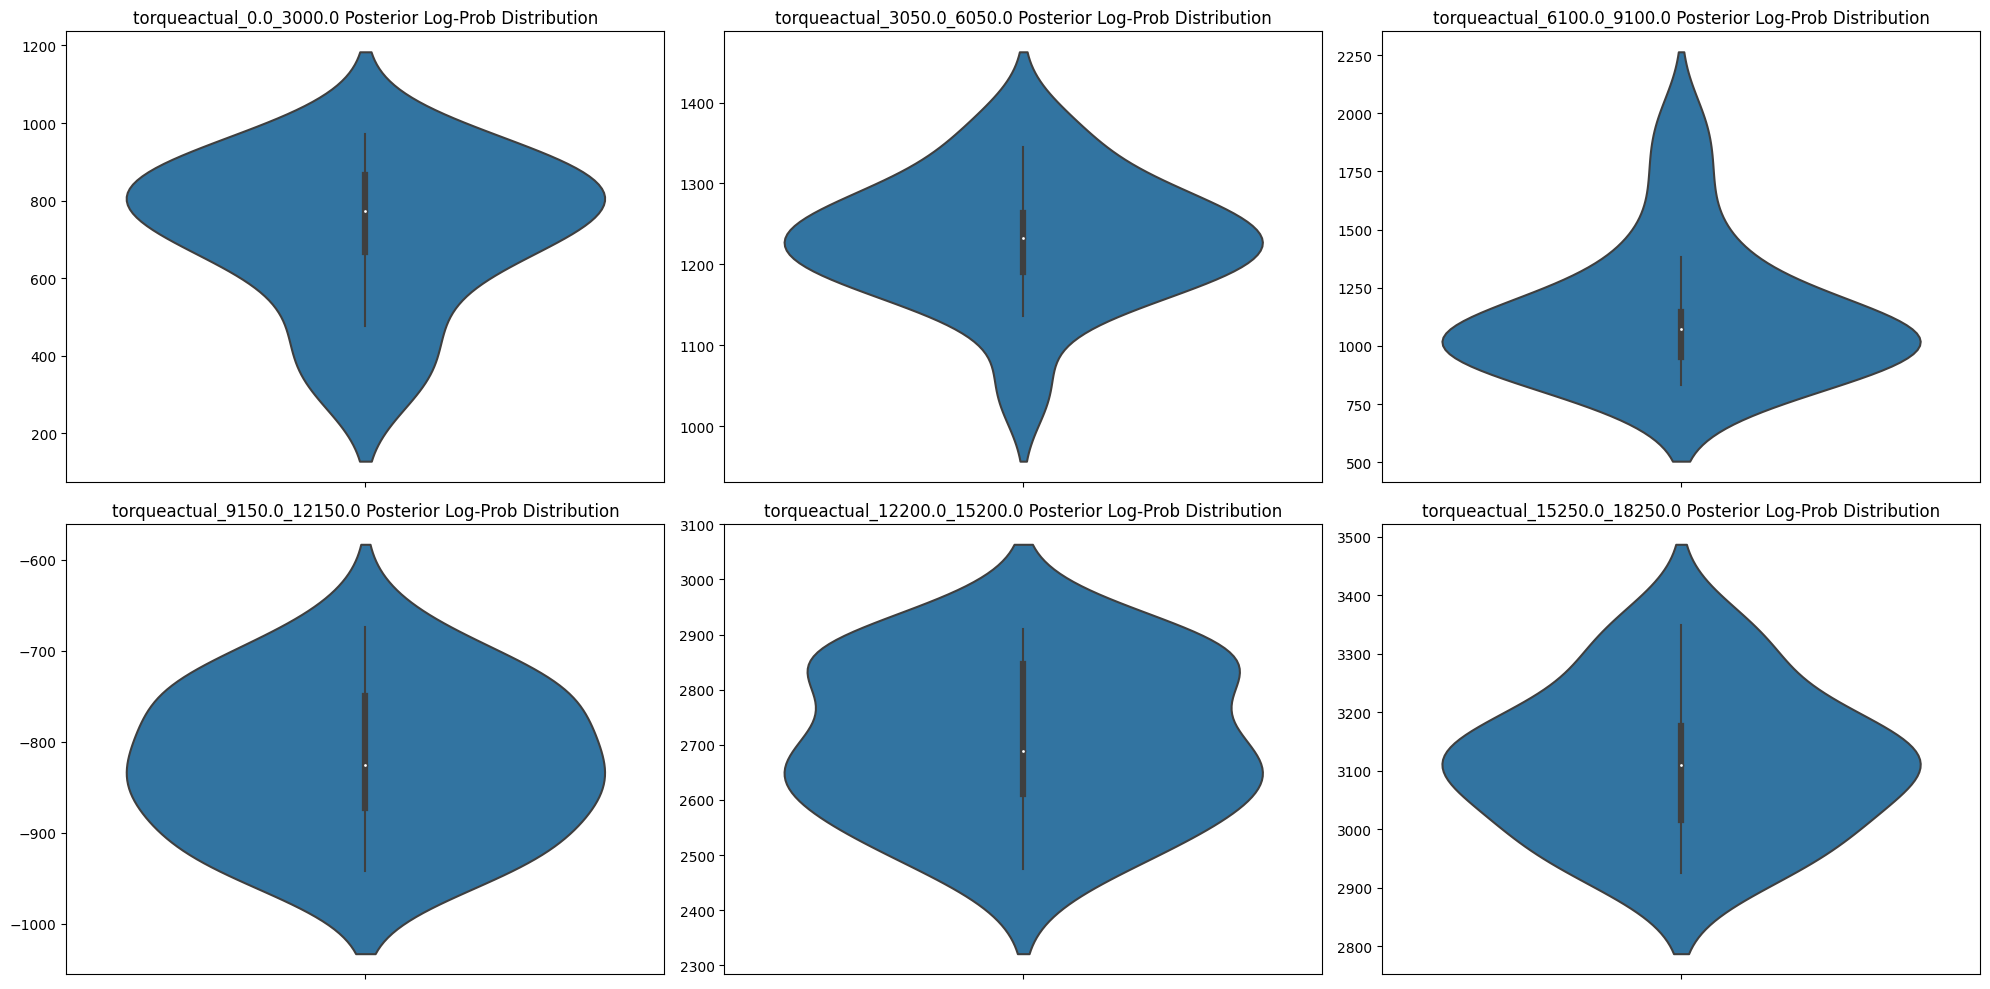

In [18]:
fig, axes = plt.subplots(2,3, figsize=(20, 10))

for i, spectrum in enumerate(models.keys()):
    log_prob_spectrum = log_probs[log_probs["spectrum"] == spectrum]
    sns.violinplot(y=log_prob_spectrum["log_prob"].values, ax=axes.flat[i], label=spectrum)
    axes.flat[i].set_title(f"{spectrum} Posterior Log-Prob Distribution")

fig.tight_layout()
plt.show()
    

---
# Preliminary Results

#### Posterior Probabilities Distribution

Plots below shows that for both models the posterior probabilities of observations are centered around two areas. One area with high values (hence high likeliness of observing the observation) and the second area is centered around low (even negative) values (indicating an unlikelines of the observation sequence)

Plot belows shows that **robot 440 is consistenly getting low posterior probabilities** while robot **448 is consistenly getting high posterior probabilities**.

In [19]:
scores_440 = scores[scores["id"].isin(tl_440["id"].values)]
scores_498 = scores[scores["id"].isin(tl_498["id"].values)]

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.violinplot(y=scores_440["first_spec"].values, ax=axes.flat[0], label="Robot 440")
sns.violinplot(y=scores_498["first_spec"].values, ax=axes.flat[0], label="Robot 448")
axes.flat[0].set_title("First Spectrum Posterior Probabilities Distribution")
sns.violinplot(y=scores_440["second_spec"].values, ax=axes.flat[1], label="Robot 440")
sns.violinplot(y=scores_498["second_spec"].values, ax=axes.flat[1], label="Robot 448")
axes.flat[1].set_title("Second Spectrum Posterior Probabilities Distribution")

plt.show()

NameError: name 'scores' is not defined

This is caused by the number of samples taking in each robot. For some unknown reason robot 440 has (approximately) half of the sample size compared to robot 498. As ilustrated in the plot below:

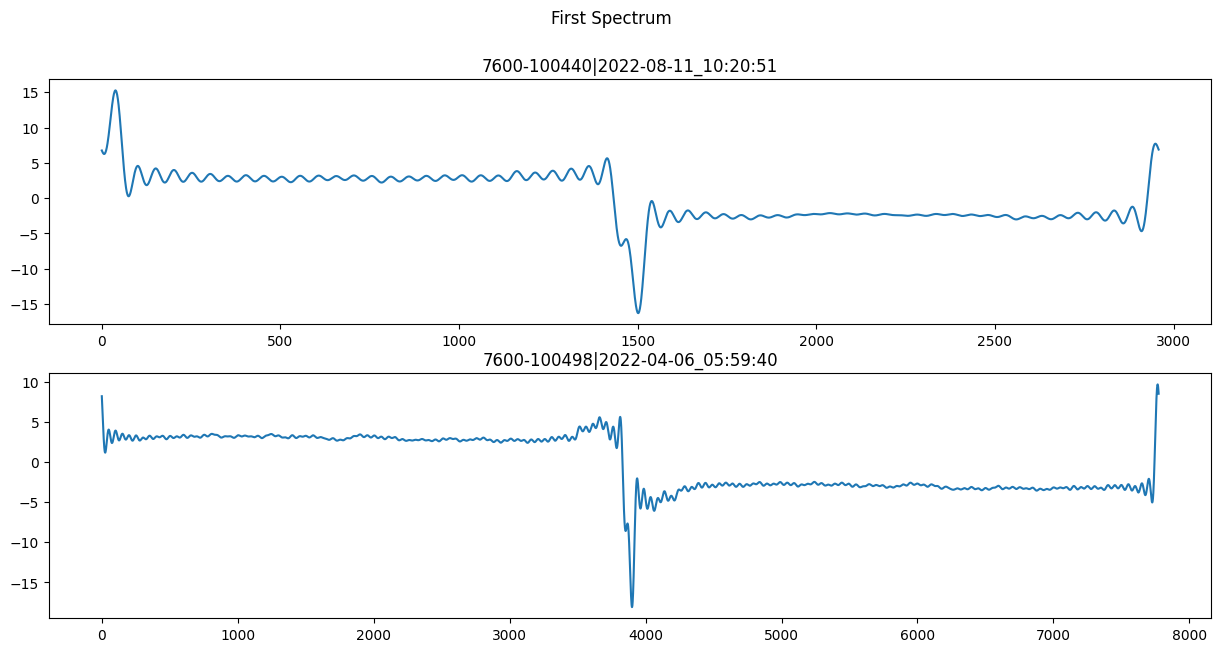

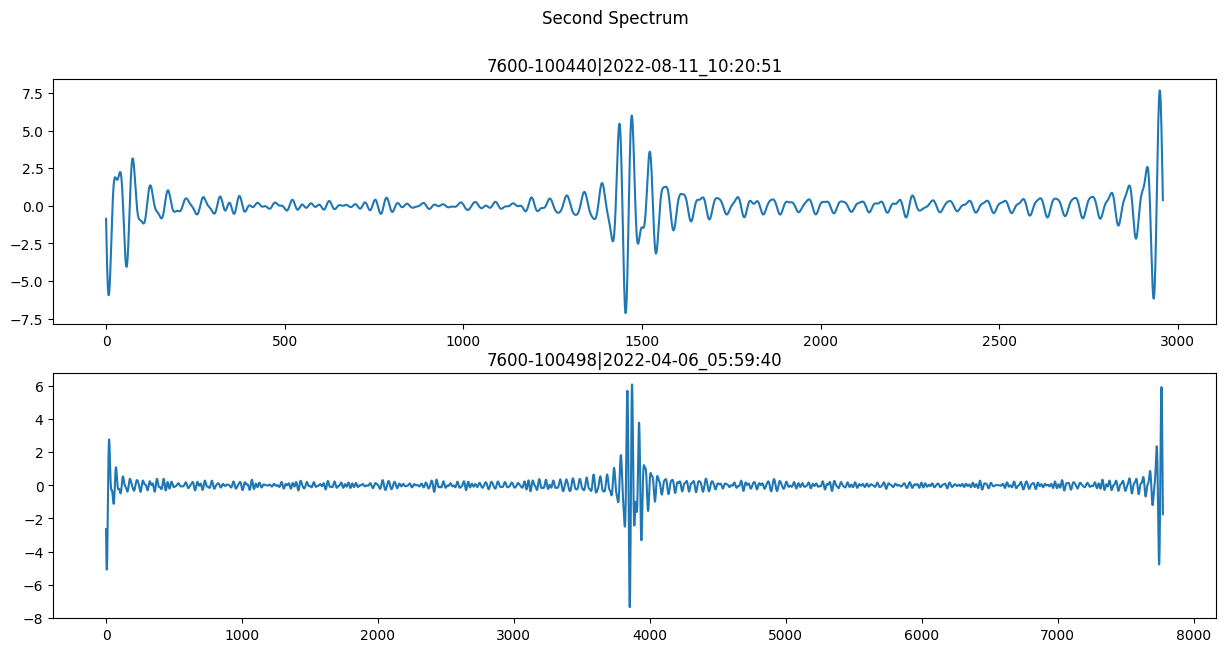

In [71]:
# Get random sample robot 440
tl_440_rand_sample_id = tl_440["id"].sample(1)
tl_440_rand_sample = tl_440[tl_440["id"] == tl_440_rand_sample_id.values[0]]

# Get random sample robot 498
tl_498_rand_sample_id = tl_498["id"].sample(1)
tl_498_rand_sample = tl_498[tl_498["id"] == tl_498_rand_sample_id.values[0]]

# Plot the random samples first spectrum
fig, axes = plt.subplots(2, 1, figsize=(15, 7))
axes.flat[0].plot(tl_440_rand_sample["torqueactual_0.0_7750.0"].values)
axes.flat[0].set_title(f"{tl_440_rand_sample_id.values[0]}")
axes.flat[1].plot(tl_498_rand_sample["torqueactual_0.0_7750.0"].values)
axes.flat[1].set_title(f"{tl_498_rand_sample_id.values[0]}")
fig.suptitle("First Spectrum")
plt.show()

# Plot the random samples second spectrum
fig, axes = plt.subplots(2, 1, figsize=(15, 7))
axes.flat[0].plot(tl_440_rand_sample["torqueactual_7800.0_15550.0"].values)
axes.flat[0].set_title(f"{tl_440_rand_sample_id.values[0]}")
axes.flat[1].plot(tl_498_rand_sample["torqueactual_7800.0_15550.0"].values)
axes.flat[1].set_title(f"{tl_498_rand_sample_id.values[0]}")
fig.suptitle("Second Spectrum")
plt.show()

From here we can try two strategies:

1. Reduce robot 498 samples size by half. This has the benefit one model per spectrum.
2. Train one model per robot type. Model specification per robot increases accuracy.


We can test the viability of strategy 1. by subsampling a robot 498 sequence to reduce it size by half. Then we can compute the posterior probability, expecting similar results as the robot 440. See results below (ONLY TESTED FOR SECOND SPECTRUM MODEL).

In [20]:
sampled_array = tl_498_rand_sample["torqueactual_7800.0_15550.0"].values
if len(sampled_array) % 2 != 0:
    sampled_array = sampled_array[:-1]
sampled_array = sampled_array.reshape(-1, 2).mean(axis=1)

print(
    f"Sampled posterior probability: {second_spec_model.posterior_prob(sampled_array.reshape(-1, 1), prep_data=False)}"
)

print(
    f"Original posterior probability: {second_spec_model.posterior_prob(tl_498_rand_sample['torqueactual_7800.0_15550.0'].values.reshape(-1, 1), prep_data=False)}"
)

fig, axes = plt.subplots(2, 1, figsize=(15, 7))
axes.flat[0].plot(sampled_array)
axes.flat[0].set_title("Sampled")
axes.flat[1].plot(
    tl_498_rand_sample["torqueactual_7800.0_15550.0"].values,
)
axes.flat[1].set_title("Original")
fig.tight_layout()
plt.show()

NameError: name 'tl_498_rand_sample' is not defined

Yet we can see a decrease in the probability the result is not representative of the distribution of posterior probabilities for the second spectrum model for robot 440. As ilustrated in plot below robot 440 posterior probabilities range (approx) between 900 and 400. With subsampling on model 498 we obtained a posterior probability of 2230.53.